In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

train_path = "../data/processed/churn_train.csv"
highrisk_path = "../artifacts/high_risk_customers.csv"

train_df = pd.read_csv(train_path)
highrisk = pd.read_csv(highrisk_path)

ARPU_month = train_df["MonthlyCharges"].mean()
ARPU_month_median = train_df["MonthlyCharges"].median()
total_customers = len(train_df)

print("ARPU (monthly mean):", round(ARPU_month,2))
print("ARPU (monthly median):", round(ARPU_month_median,2))
print("Total customers (train sample):", total_customers)
print("High-risk entries available:", len(highrisk))


ARPU (monthly mean): 65.0
ARPU (monthly median): 70.6
Total customers (train sample): 5625
High-risk entries available: 1407


In [10]:
scenarios = {
    "Conservative": {"contact_pct": 0.05, "contact_cost": 500, "success_rate": 0.15},
    "Realistic":   {"contact_pct": 0.10, "contact_cost": 400, "success_rate": 0.30},
    "Aggressive":  {"contact_pct": 0.20, "contact_cost": 300, "success_rate": 0.45},
}

results = []
for name, p in scenarios.items():
    N_contact = int(len(highrisk) * p["contact_pct"])        # number to contact
    expected_retained = N_contact * p["success_rate"]
    revenue_per_retained_ann = ARPU_month * 12               # assume 12 months
    annual_revenue_saved = expected_retained * revenue_per_retained_ann
    campaign_cost = N_contact * p["contact_cost"]
    net_gain = annual_revenue_saved - campaign_cost
    roi = (net_gain / campaign_cost * 100) if campaign_cost > 0 else np.nan
    results.append({
        "scenario": name,
        "N_contact": N_contact,
        "expected_retained": int(expected_retained),
        "annual_revenue_saved": round(annual_revenue_saved,2),
        "campaign_cost": campaign_cost,
        "net_gain": round(net_gain,2),
        "roi_pct": round(roi,2)
    })

roi_df = pd.DataFrame(results)
roi_df


,scenario,N_contact,expected_retained,annual_revenue_saved,campaign_cost,net_gain,roi_pct
0,Conservative,70,10,8189.91,35000,-26810.09,-76.6
1,Realistic,140,42,32759.66,56000,-23240.34,-41.5
2,Aggressive,281,126,98629.96,84300,14329.96,17.0


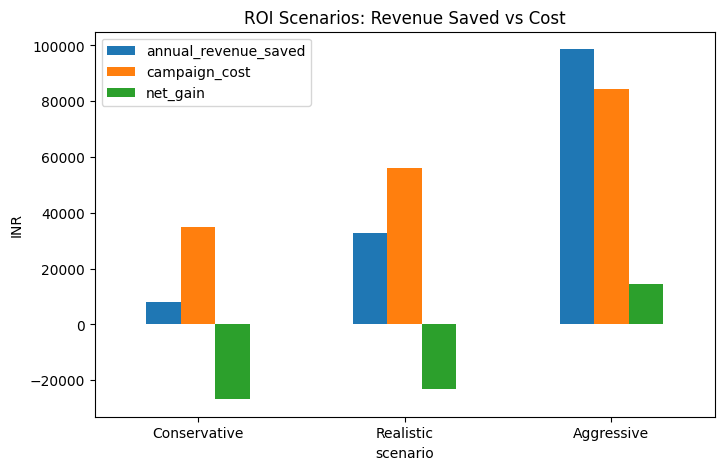

In [11]:
roi_df.plot(x="scenario", y=["annual_revenue_saved","campaign_cost","net_gain"], kind="bar", figsize=(8,5))
plt.title("ROI Scenarios: Revenue Saved vs Cost")
plt.ylabel("INR")
plt.xticks(rotation=0)
plt.show()


In [14]:
roi_df.to_csv("../reports/roi_scenarios.csv", index=False)
print("Saved reports/roi_scenarios.csv")


Saved reports/roi_scenarios.csv
